In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import matplotlib.gridspec as gridspec




%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [109]:
mouse = '4222175.0'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1988,4222175.0,04_06_2019,1,TwoTower_foraging,61,1,CA1,2019-06-04,G:\My Drive\VR_Data\TwoTower\4222175.0\04_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\04_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\04_06_2...
1990,4222175.0,04_06_2019,3,TwoTower_foraging,71,1,CA1,2019-06-04,G:\My Drive\VR_Data\TwoTower\4222175.0\04_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\04_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\04_06_2...
2021,4222175.0,06_06_2019,2,TwoTower_foraging,60,1,CA1,2019-06-06,G:\My Drive\VR_Data\TwoTower\4222175.0\06_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\06_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\06_06_2...
2043,4222175.0,08_06_2019,2,TwoTower_foraging,61,1,CA1,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222175.0\08_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\08_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\08_06_2...
2118,4222175.0,15_06_2019,2,TwoTower_foraging,79,1,CA1,2019-06-15,G:\My Drive\VR_Data\TwoTower\4222175.0\15_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\15_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\15_06_2...
2148,4222175.0,18_06_2019,2,TwoTower_foraging,86,1,CA1,2019-06-18,G:\My Drive\VR_Data\TwoTower\4222175.0\18_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\18_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\18_06_2...
2172,4222175.0,20_06_2019,2,TwoTower_foraging,82,1,CA1,2019-06-20,G:\My Drive\VR_Data\TwoTower\4222175.0\20_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222175.0\20_06_2...,G:\My Drive\2P_Data\TwoTower\4222175.0\20_06_2...


In [110]:
sess = df_mouse.iloc[-1]

In [111]:
VRDat,C, S, A = pp.load_scan_sess(sess)

num aberrant ttls 0.0
22315 (22315,) (22315, 21) 63175


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [112]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=5,speed=VRDat['speed'])
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effMorph = (effMorph+.25)/1.5

In [113]:
print(centers[25])

127.5


In [114]:
S_trial_mat[np.isnan(S_trial_mat)]=0
# S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
S_tmat = np.reshape(S_trial_mat[:,:1,:],[S_trial_mat.shape[0],-1])
# S_tmat = S_tmat[effMorph<.5,:]
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
S_t_rmat = np.matmul(S_tmat,S_tmat.T)

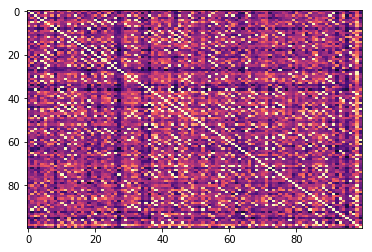

In [115]:
f,ax = plt.subplots()
ax.imshow(S_t_rmat,aspect='auto',cmap='magma',vmax = np.percentile(S_t_rmat,95),vmin=0)

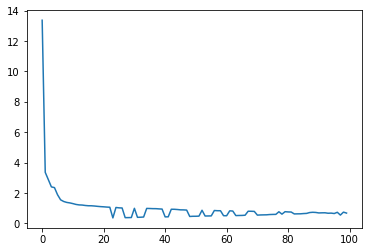

In [116]:
w,V = np.linalg.eig(S_t_rmat)
f,ax = plt.subplots()
ax.plot(w)

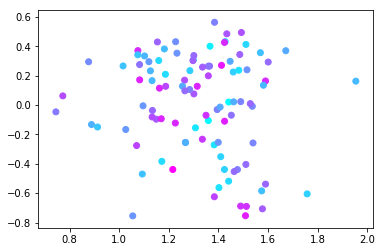

In [117]:
VV = np.matmul(S_t_rmat,V)
f,ax = plt.subplots()
ax.scatter(VV[:,0],VV[:,1],c=effMorph,cmap='cool')

In [118]:
msort = np.argsort(effMorph)

In [119]:
C_msort = sm._sort_simmat(S_t_rmat,msort)

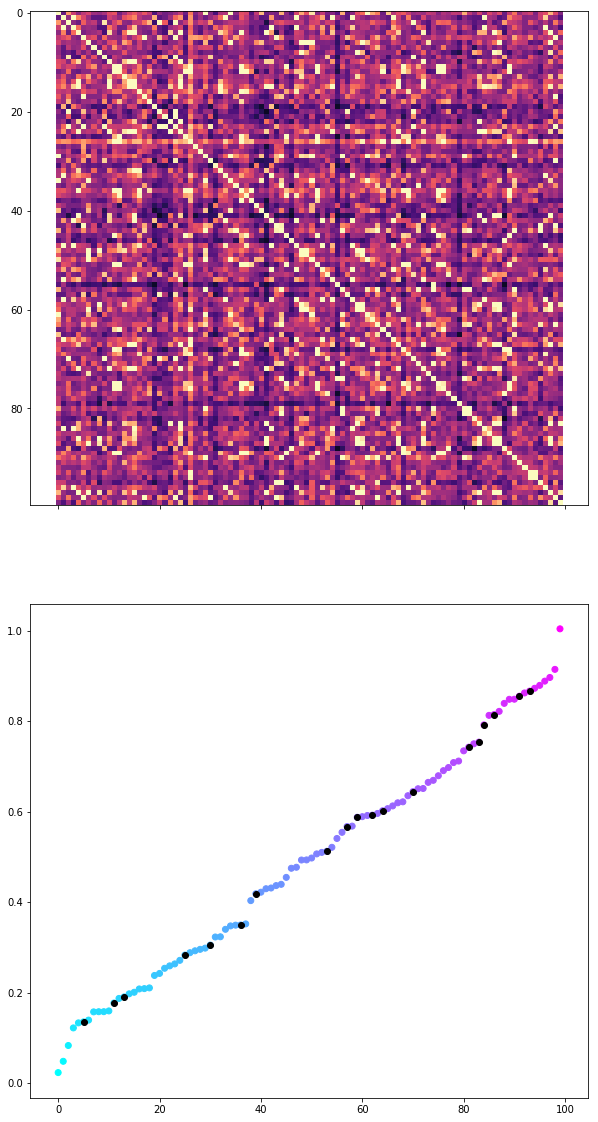

In [120]:
f,ax = plt.subplots(2,1,sharex=True,figsize=[10,20])
ax[0].imshow(C_msort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95),vmin=0)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[msort],c=effMorph[msort],cmap='cool')
emr = np.copy(effMorph)
emr[trial_info['rewards']>0]=np.nan
ax[1].scatter(np.arange(effMorph.shape[0]),emr[msort],c='black')

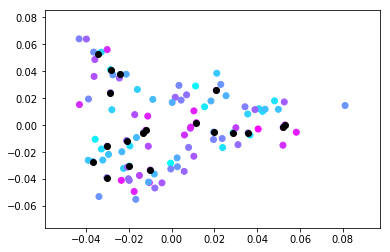

In [121]:
from sklearn.manifold import SpectralEmbedding as se

X = se(affinity='precomputed').fit_transform(S_t_rmat)
f,ax = plt.subplots()

emr = np.copy(X)
emr[trial_info['rewards']>0,:]=np.nan

ax.scatter(X[:,0],X[:,1],c=effMorph,cmap='cool')
ax.scatter(emr[:,0],emr[:,1],c='black')

In [122]:
labels = sm.cluster_simmat(S_t_rmat)
nc = np.unique(labels).shape[0]
clustmean = np.array([effMorph[labels==i].mean() for i in range(nc)])
clusterOrder = np.argsort(clustmean)
llabels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    llabels[labels==cl]=i
#print(clusterOrder)


clustsort = sm._sort_clusters(sm.cluster_simmat(S_t_rmat),effMorph)
C_csort = sm._sort_simmat(S_t_rmat,clustsort)
print(nc)

4.187527269187114
5.181294892416597
5.939454477065419
6.441325456401713
6.5042993585484545
6.110713890310125
6.08865529758953
6.100969287219038
4.187527269187114
5.181294892416597
5.939454477065419
6.441325456401713
6.491590607882365
6.132634630592999
5.99460324175982
6.11057003708492
5


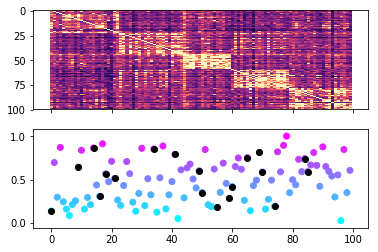

In [123]:
f,ax = plt.subplots(2,1,sharex=True)
ax[0].imshow(C_csort,aspect='auto',cmap='magma',vmax = np.percentile(C_msort,95),vmin=0)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[clustsort],c=effMorph[clustsort],cmap='cool')
emr = np.copy(effMorph)
emr[trial_info['rewards']>0]=np.nan
ax[1].scatter(np.arange(effMorph.shape[0]),emr[clustsort],c='black')





4.229803262498544
5.038504380497434
6.026799494395789
6.519150391844812
6.4817477928325635
6.236146320897199
6.314054176971797
6.0567969943178515
4.229803262498544
5.343300970754429
6.026799494395789
6.519150391844812
6.610402509309196
6.354670726616003
6.403356471523311
6.116076727211028


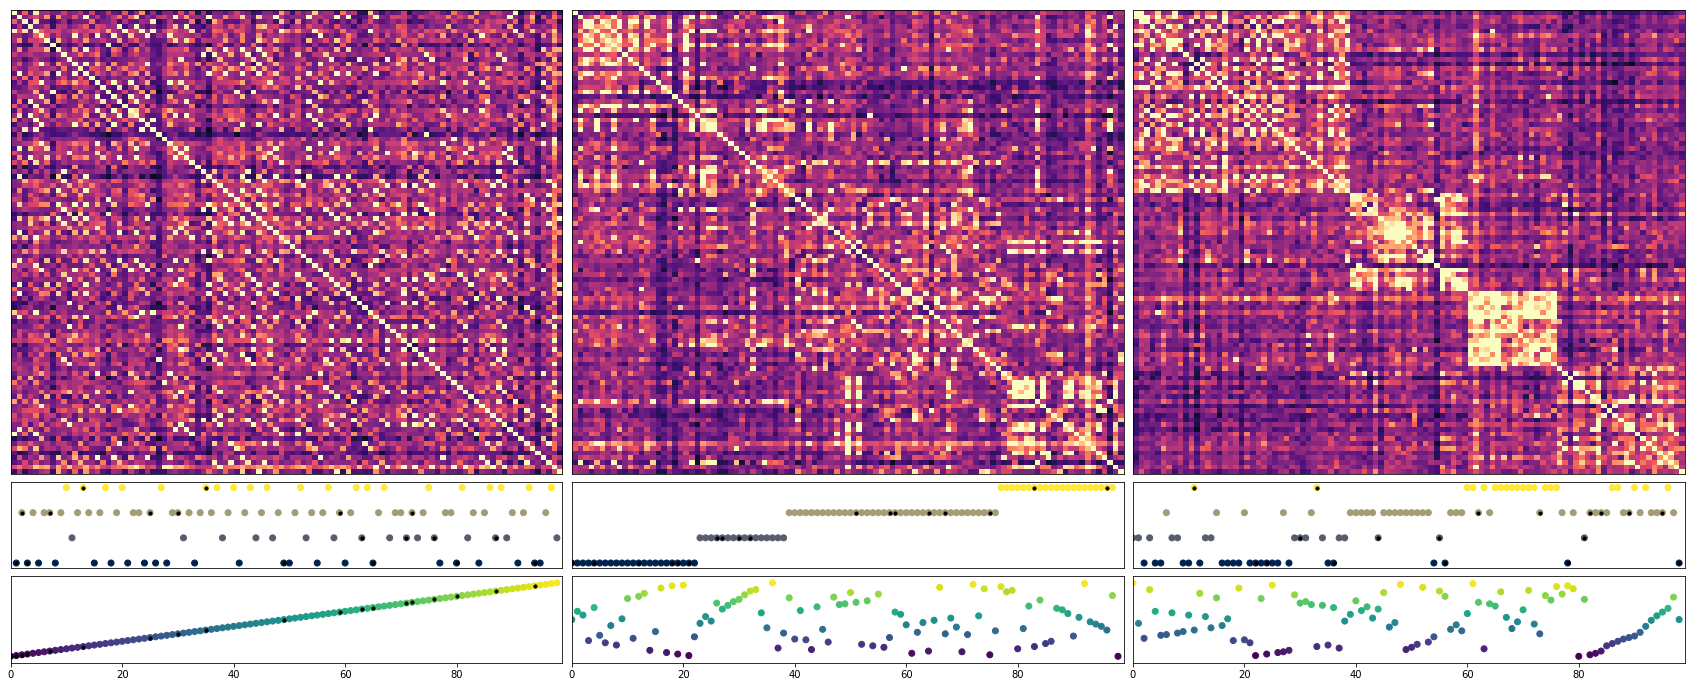

In [124]:
t_1back = {}
for k,v in trial_info.items():
    t_1back[k]=v[:-1]
labels = sm.cluster_simmat(S_t_rmat[1:,1:])
em = effMorph[1:]
nc = np.unique(labels).shape[0]
clustmean = np.array([em[labels==i].mean() for i in range(nc)])
clusterOrder = np.argsort(clustmean)
llabels = np.zeros(em.shape)
for i,cl in enumerate(clusterOrder.tolist()):
    llabels[labels==cl]=i


t_1back['morphs']=np.zeros(t_1back['morphs'].shape)
t_1back['morphs'][1:]=llabels[0:-1]
t_1back['morphs'][0]=np.nan
t_1back['bckgndJitter']=0
t_1back['wallJitter']=0
t_1back['towerJitter']=0

f,axes = sm.plot_trial_simmat(S_t_rmat[1:,1:],t_1back,morphcm='cividis')
#f.savefig('4139224_sess3_1frame_1backclust.pdf',format='pdf')

In [107]:
# print(labels)
prelabels,postlabels,postreward = llabels[0:-1],llabels[1:],trial_info['rewards'][1:]
transmat = np.zeros([int(np.amax(llabels)+1),int(np.amax(llabels)+1)])

premorph,postmorph = trial_info['morphs'][0:-1],trial_info['morphs'][1:]#effMorph[1:]
for i in range(int(np.amax(llabels)+1)):
    mask = prelabels ==i
    
    transmat[i,:],edges = np.histogram(postlabels[mask],bins=np.arange(0,np.amax(llabels)+2))
    transmat[i,:]/=transmat[i,:].sum()
    print("node ", i)
    print("next node", postlabels[mask])
    
    print("last morph", premorph[mask])
    print("morph", postmorph[mask])
    print("reward", postreward[mask])
    print(transmat[i,:])
    

node  0
next node [1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0.]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 58

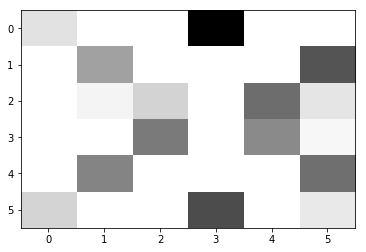

In [20]:
f,ax = plt.subplots()
# transmat = transmat[clusterOrder,:]
# transmat = transmat[:,clusterOrder]
ax.imshow(transmat,aspect='auto',cmap='Greys')

In [21]:
print(llabels)

[3. 2. 4. 1. 1. 5. 3. 4. 5. 0. 0. 3. 2. 2. 5. 3. 2. 2. 1. 1. 5. 3. 2. 4.
 5. 3. 4. 1. 5. 3. 5. 5. 0. 3. 2. 4. 1. 5. 3. 2. 4. 5. 5. 0. 3. 2. 5. 5.
 3. 2. 4. 5. 3. 2. 4. 5. 3. 4. 1. 5. 3. 4. 1. 1. 1. 1. 5. 0. 3. 4. 1. 5.
 3. 4. 1. 5. 3. 4. 5. 0. 3. 4. 5. 3. 4. 5. 3. 2. 2. 4.]


In [22]:
S_clust_mat = np.zeros([int(np.amax(llabels)+1),S_trial_mat.shape[1],S_trial_mat.shape[2]])
for l in np.unique(llabels).tolist():
    S_clust_mat[int(l),:,:] = np.squeeze(np.nanmean(S_trial_mat[llabels==l,:,:],axis=0))

In [23]:
print(S_clust_mat.shape)

(6, 45, 2005)


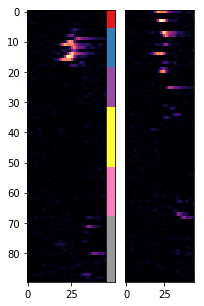

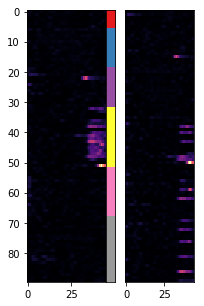

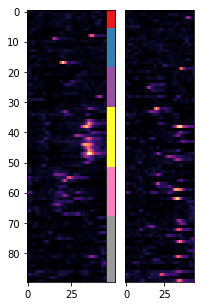

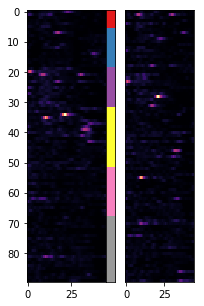

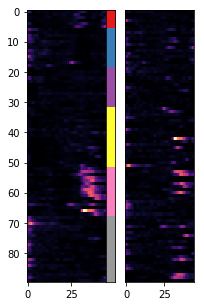

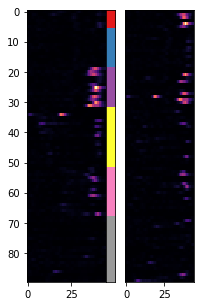

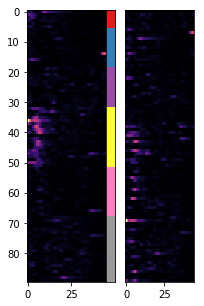

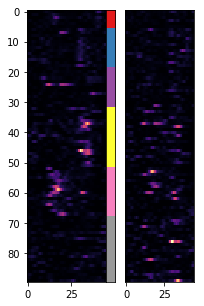

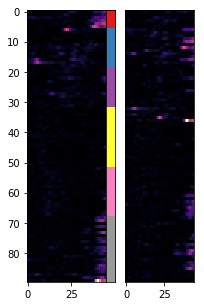

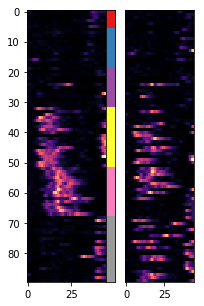

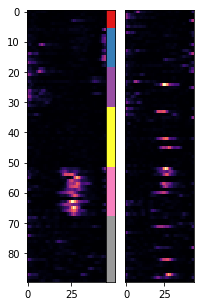

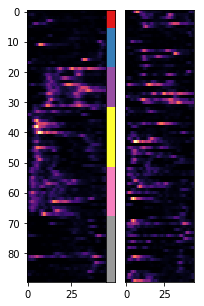

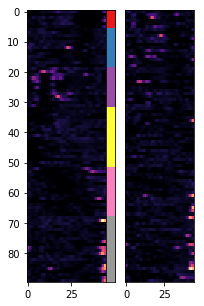

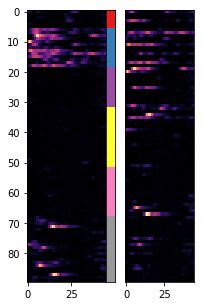

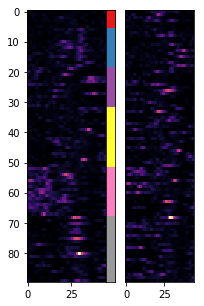

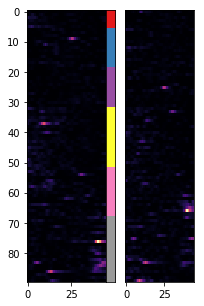

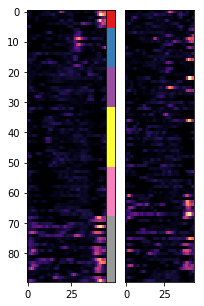

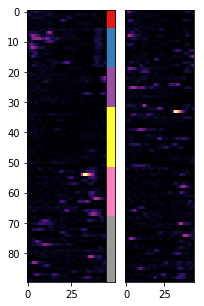

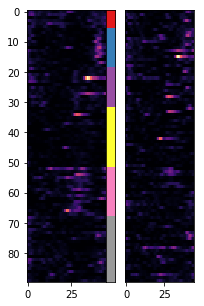

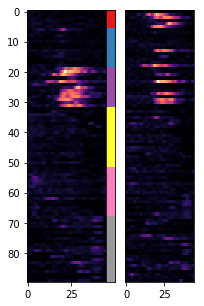

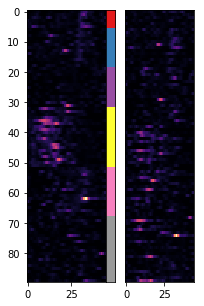

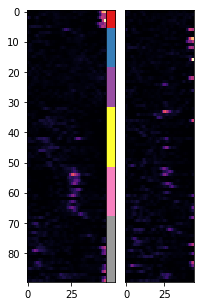

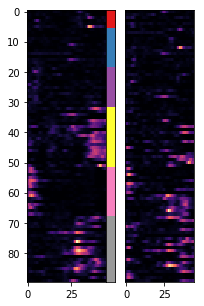

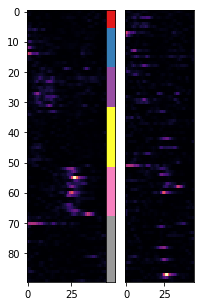

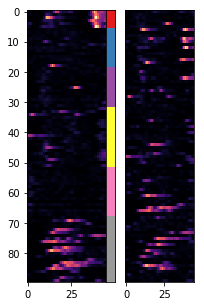

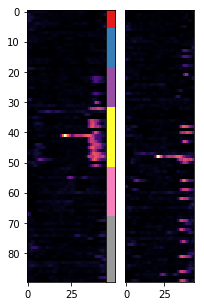

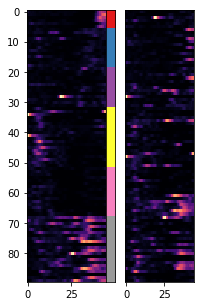

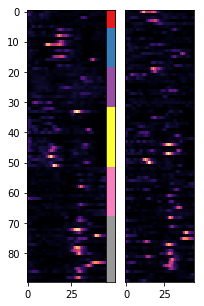

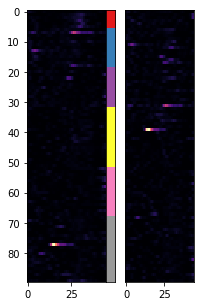

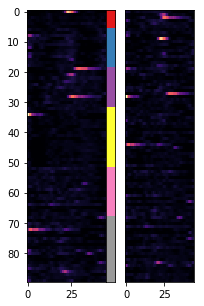

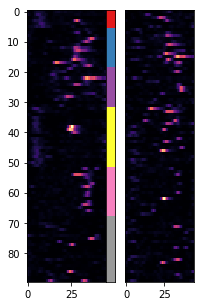

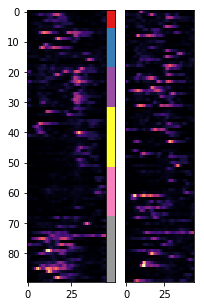

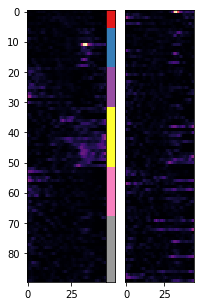

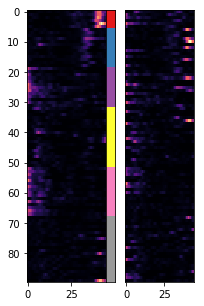

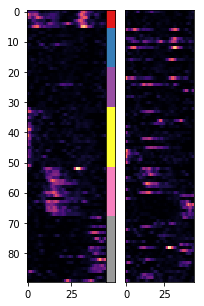

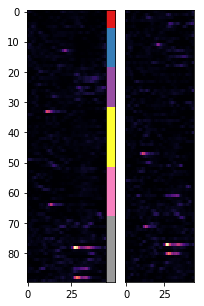

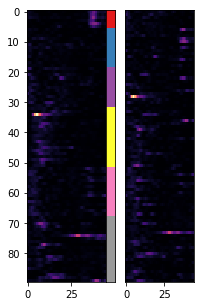

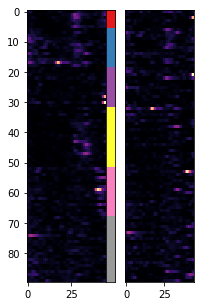

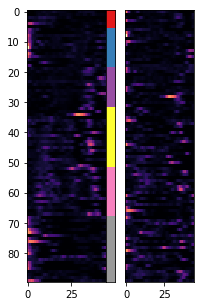

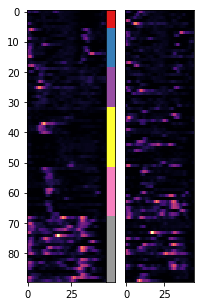

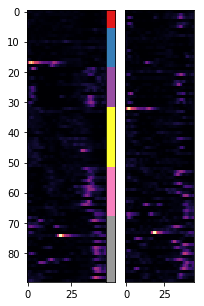

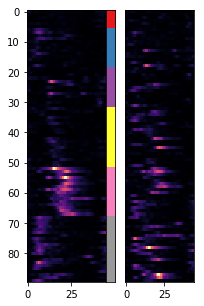

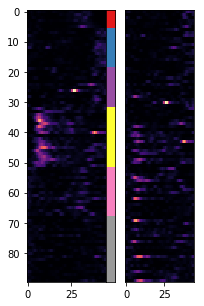

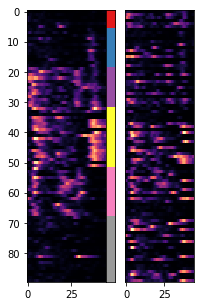

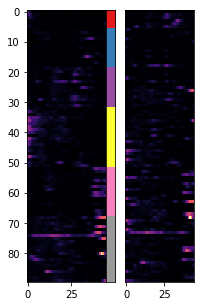

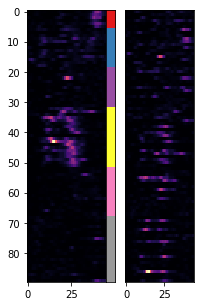

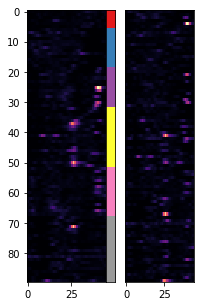

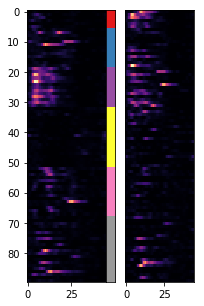

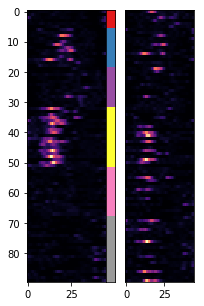

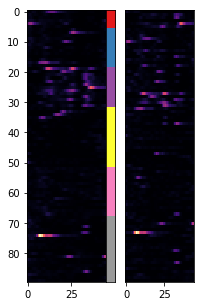

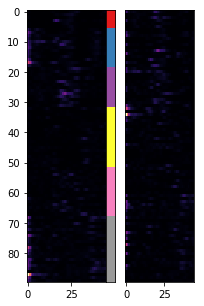

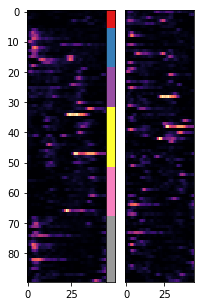

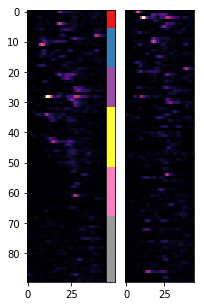

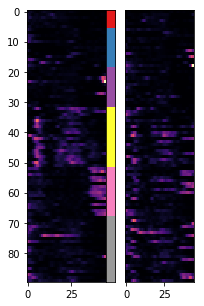

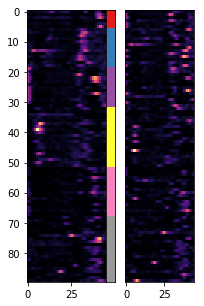

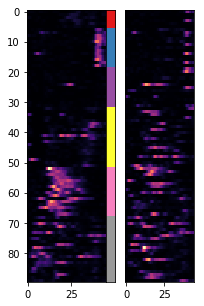

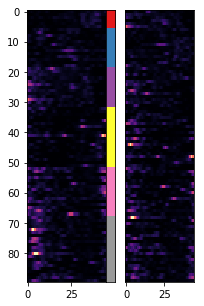

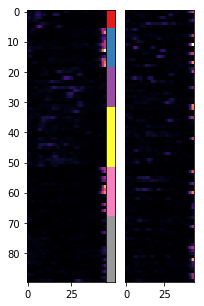

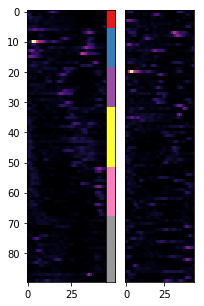

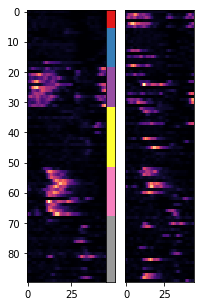

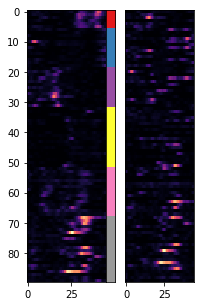

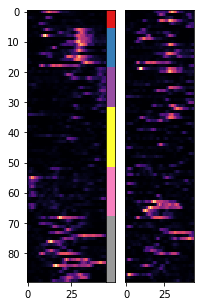

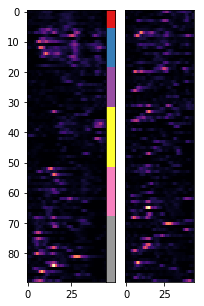

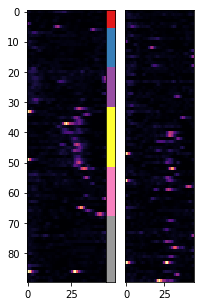

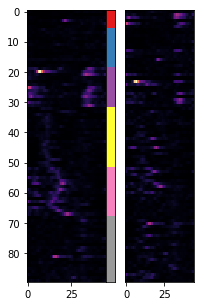

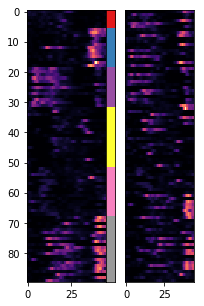

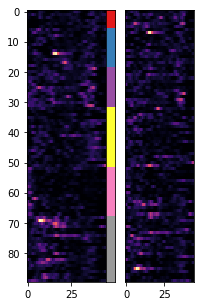

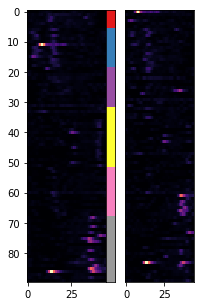

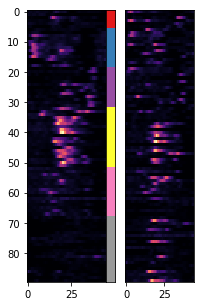

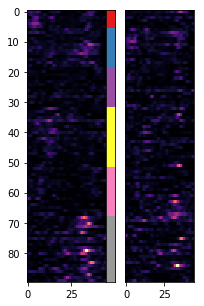

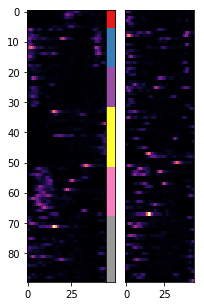

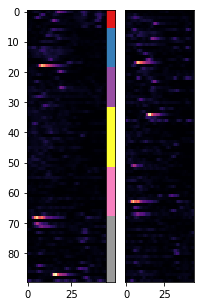

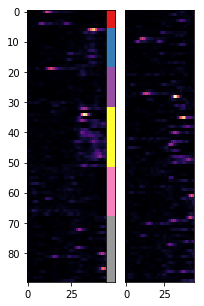

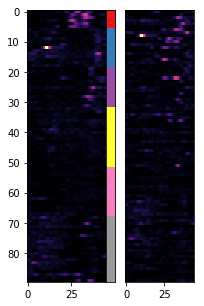

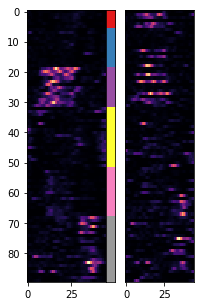

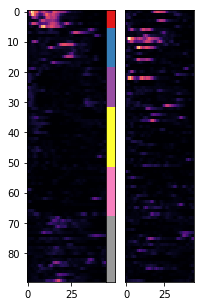

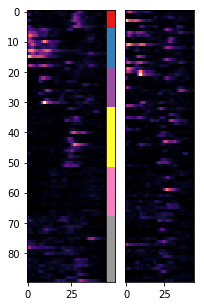

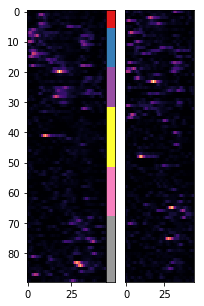

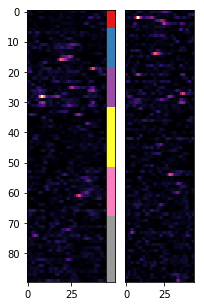

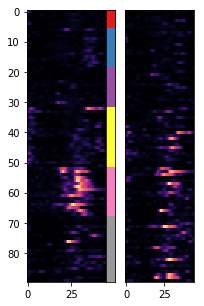

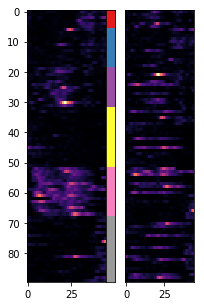

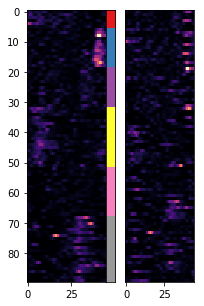

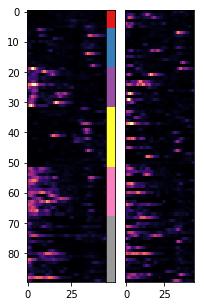

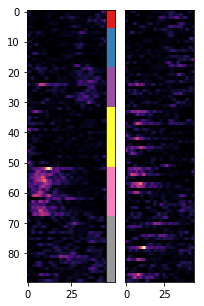

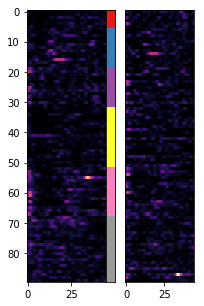

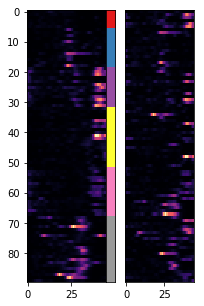

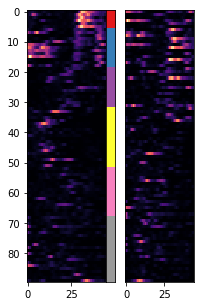

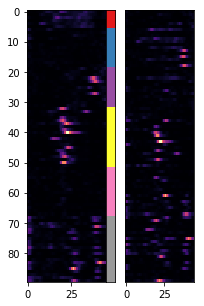

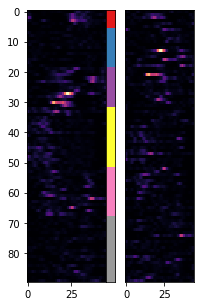

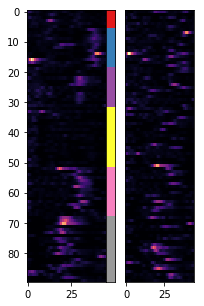

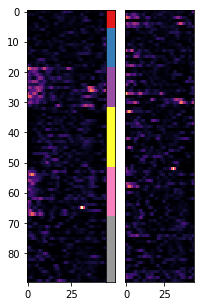

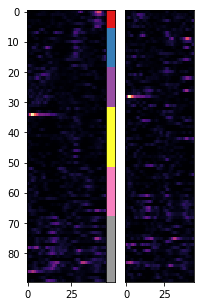

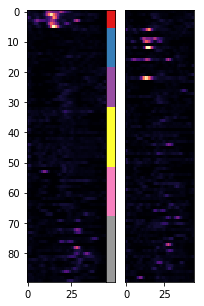

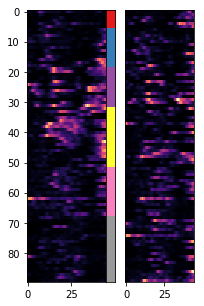

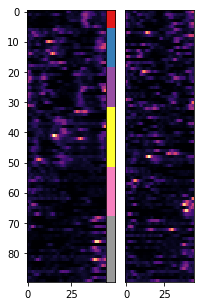

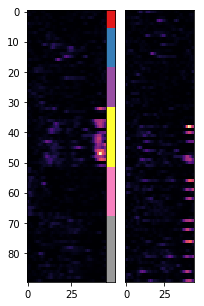

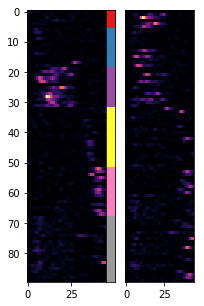

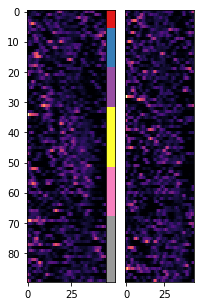

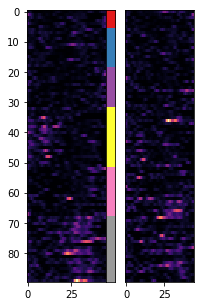

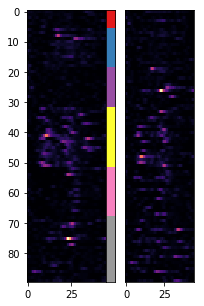

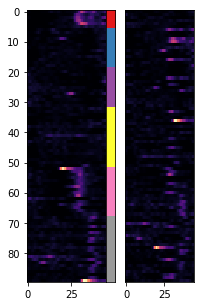

In [30]:
S_trial_mat_sm = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
S_clust_sort = S_trial_mat_sm[np.argsort(llabels),:,:]
for c in range(0,S_trial_mat.shape[-1],20):
    gs = gridspec.GridSpec(1,17)
    gs.update(wspace=.0)
    f = plt.figure(figsize=[3,5])
    ax = f.add_subplot(gs[:,:8])
#     f,ax = plt.subplots(1,2,sharey=True)
    ax.imshow(S_clust_sort[:,:,c]/np.nanmean(S_clust_sort[:,:,c].ravel()),cmap='magma',aspect='auto')
    ax = f.add_subplot(gs[:,8])
    llabels_p = llabels[:,np.newaxis]*np.ones([1,2])

    ax.imshow(llabels_p[np.argsort(llabels),:],aspect='auto',cmap='Set1')
#     ax.scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)[::-1]],s=7,cmap='Set1')
#     ax.set_ylim([0,llabels.shape[0]])
#     ax.set_xlim([-.1,.1])
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = f.add_subplot(gs[:,10:])
    ax.imshow(S_trial_mat_sm[msort,:,c],cmap='magma',aspect='auto')
    ax.set_yticks([])
#     ax[1].scatter(np.zeros(llabels.shape),np.arange(llabels.shape[0]),c=llabels[np.argsort(llabels)],cmap='set1')